In [1]:
import pandas as pd  # Importing pandas for data manipulation and handling CSV file operations.
from nltk.stem.porter import PorterStemmer  # Importing PorterStemmer from nltk for stemming words to their root form.
from sklearn.feature_extraction.text import CountVectorizer  # Importing CountVectorizer from sklearn for converting text data into numerical feature vectors.
from sklearn.metrics.pairwise import cosine_similarity  # Importing cosine_similarity from sklearn for calculating the cosine similarity between vectors.
import matplotlib.pyplot as plt  # Importing matplotlib for creating static, animated, and interactive visualizations.
import seaborn as sns  # Importing seaborn for making statistical graphics, built on top of matplotlib.

import random
import numpy as np  

In [2]:
# Loading the medicine dataset from a CSV file.
medicines = pd.read_csv('medicine.csv')

In [3]:
# Displaying the first few rows of the dataset.
medicines.head()

index                                          Drug_Name Reason  \
0      1               A CN Gel(Topical) 20gmA CN Soap 75gm   Acne   
1      2  A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...   Acne   
2      3                             ACGEL CL NANO Gel 15gm   Acne   
3      4                                ACGEL NANO Gel 15gm   Acne   
4      5                              Acleen 1% Lotion 25ml   Acne   

                                         Description  
0                      Mild to moderate acne (spots)  
1  A RET 0.025% is a prescription medicine that i...  
2  It is used to treat acne vulgaris in people 12...  
3  It is used to treat acne vulgaris in people 12...  
4  treat the most severe form of acne (nodular ac...

In [4]:
# Getting the shape of the dataset to understand its dimensions.
medicines.shape

(9720, 4)

In [5]:
# Checking for any missing values in the dataset.
medicines.isnull().sum()

index          0
Drug_Name      0
Reason         0
Description    0
dtype: int64

In [6]:
# Dropping any rows with missing values.
medicines.dropna(inplace=True)

In [7]:
# Checking for any duplicate rows in the dataset.
medicines.duplicated().sum()

0

In [8]:
# Accessing the 'Description' column of the dataset.
medicines['Description']

0                           Mild to moderate acne (spots)
1       A RET 0.025% is a prescription medicine that i...
2       It is used to treat acne vulgaris in people 12...
3       It is used to treat acne vulgaris in people 12...
4       treat the most severe form of acne (nodular ac...
                              ...                        
9715                              used for treating warts
9716                        used to soften the skin cells
9717                                       used for scars
9718                                      used for wounds
9719    used to treat and remove raised warts (usually...
Name: Description, Length: 9720, dtype: object

In [9]:
# Splitting the 'Description' column into a list of words.
medicines['Description'].apply(lambda x:x.split())

0                     [Mild, to, moderate, acne, (spots)]
1       [A, RET, 0.025%, is, a, prescription, medicine...
2       [It, is, used, to, treat, acne, vulgaris, in, ...
3       [It, is, used, to, treat, acne, vulgaris, in, ...
4       [treat, the, most, severe, form, of, acne, (no...
                              ...                        
9715                         [used, for, treating, warts]
9716                 [used, to, soften, the, skin, cells]
9717                                   [used, for, scars]
9718                                  [used, for, wounds]
9719    [used, to, treat, and, remove, raised, warts, ...
Name: Description, Length: 9720, dtype: object

In [10]:
# Splitting the 'Reason' column into a list of words.
medicines['Reason'] = medicines['Reason'].apply(lambda x:x.split())

In [11]:
# Reapplying the split operation on the 'Description' column to ensure consistency.
medicines['Description'] = medicines['Description'].apply(lambda x:x.split())

In [12]:
# Removing any spaces within the words in the 'Description' column.
medicines['Description'] = medicines['Description'].apply(lambda x:[i.replace(" ","") for i in x])

In [13]:
# Creating a new column 'tags' by combining 'Description' and 'Reason' columns.
medicines['tags'] = medicines['Description'] + medicines['Reason'] 

In [14]:
# Creating a new dataframe 'new_df' with selected columns.
new_df = medicines[['index','Drug_Name','tags']]

# Displaying the new dataframe.
new_df

index                                          Drug_Name  \
0         1               A CN Gel(Topical) 20gmA CN Soap 75gm   
1         2  A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...   
2         3                             ACGEL CL NANO Gel 15gm   
3         4                                ACGEL NANO Gel 15gm   
4         5                              Acleen 1% Lotion 25ml   
...     ...                                                ...   
9715   9716                                T Muce Ointment 5gm   
9716   9717  Wokadine 10% Solution 100mlWokadine Solution 5...   
9717   9718                               Wokadine M Onit 10gm   
9718   9719                           Wound Fix Solution 100ml   
9719   9720                              Wounsol Ointment 15gm   

                                                   tags  
0             [Mild, to, moderate, acne, (spots), Acne]  
1     [A, RET, 0.025%, is, a, prescription, medicine...  
2     [It, is, used, to, treat, acne, vulgaris, in, ...  
3     [It, is, used, to, treat, acne, vulgaris, in, ...  
4     [treat, the, most, severe, form, of, acne, (no...  
...                                                 ...  
9715                [used, for, treating, warts, Wound]  
9716        [used, to, soften, the, skin, cells, Wound]  
9717                          [used, for, scars, Wound]  
9718                         [used, for, wounds, Wound]  
9719  [used, to, treat, and, remove, raised, warts, ...  

[9720 rows x 3 columns]

In [15]:
# Joining the list of words in the 'tags' column into a single string.
new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))

# Displaying the updated dataframe.
new_df


C:\Users\egypt\AppData\Local\Temp\ipykernel_2828\2986193437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))


index                                          Drug_Name  \
0         1               A CN Gel(Topical) 20gmA CN Soap 75gm   
1         2  A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...   
2         3                             ACGEL CL NANO Gel 15gm   
3         4                                ACGEL NANO Gel 15gm   
4         5                              Acleen 1% Lotion 25ml   
...     ...                                                ...   
9715   9716                                T Muce Ointment 5gm   
9716   9717  Wokadine 10% Solution 100mlWokadine Solution 5...   
9717   9718                               Wokadine M Onit 10gm   
9718   9719                           Wound Fix Solution 100ml   
9719   9720                              Wounsol Ointment 15gm   

                                                   tags  
0                    Mild to moderate acne (spots) Acne  
1     A RET 0.025% is a prescription medicine that i...  
2     It is used to treat acne vulgaris in people 12...  
3     It is used to treat acne vulgaris in people 12...  
4     treat the most severe form of acne (nodular ac...  
...                                                 ...  
9715                      used for treating warts Wound  
9716                used to soften the skin cells Wound  
9717                               used for scars Wound  
9718                              used for wounds Wound  
9719  used to treat and remove raised warts (usually...  

[9720 rows x 3 columns]

In [16]:
# Converting the 'tags' column to lowercase.
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

# Displaying the updated dataframe.
new_df


C:\Users\egypt\AppData\Local\Temp\ipykernel_2828\2546393387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


index                                          Drug_Name  \
0         1               A CN Gel(Topical) 20gmA CN Soap 75gm   
1         2  A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...   
2         3                             ACGEL CL NANO Gel 15gm   
3         4                                ACGEL NANO Gel 15gm   
4         5                              Acleen 1% Lotion 25ml   
...     ...                                                ...   
9715   9716                                T Muce Ointment 5gm   
9716   9717  Wokadine 10% Solution 100mlWokadine Solution 5...   
9717   9718                               Wokadine M Onit 10gm   
9718   9719                           Wound Fix Solution 100ml   
9719   9720                              Wounsol Ointment 15gm   

                                                   tags  
0                    mild to moderate acne (spots) acne  
1     a ret 0.025% is a prescription medicine that i...  
2     it is used to treat acne vulgaris in people 12...  
3     it is used to treat acne vulgaris in people 12...  
4     treat the most severe form of acne (nodular ac...  
...                                                 ...  
9715                      used for treating warts wound  
9716                used to soften the skin cells wound  
9717                               used for scars wound  
9718                              used for wounds wound  
9719  used to treat and remove raised warts (usually...  

[9720 rows x 3 columns]

In [17]:
# Bag of Words (BoW) ----> bad 
# TF-IDF ------> bad 
# CountVectorizer -------> good 

cv = CountVectorizer(stop_words='english',max_features=5000) # Initializing CountVectorizer with stop words and max features.

In [18]:
ps = PorterStemmer() # Initializing the PorterStemmer object for stemming words to their root form.

In [19]:
# Defining a function to apply stemming to the text.
def stem(text):
  y = []

  for i in text.split(): # Splitting the text into words.
    y.append(ps.stem(i)) # Stemming each word and appending to the list y.

  return " ".join(y) # Joining the stemmed words into a single string. 

In [20]:
# Applying the stem function to the 'tags' column.
new_df['tags'] = new_df['tags'].apply(stem)

C:\Users\egypt\AppData\Local\Temp\ipykernel_2828\3886107555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


In [21]:
# Fitting and transforming the 'tags' column using CountVectorizer and converting to an array.
cv.fit_transform(new_df['tags']).toarray().shape

(9720, 806)

In [22]:
# Converting the transformed text data into an array of vectors.
vectors = cv.fit_transform(new_df['tags']).toarray()

# Displaying vectors
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
# Calculating the cosine similarity between the vectors.
cosine_similarity(vectors)


array([[1.        , 0.25197632, 0.43643578, ..., 0.        , 0.        ,
        0.        ],
       [0.25197632, 1.        , 0.25660012, ..., 0.19245009, 0.1490712 ,
        0.0860663 ],
       [0.43643578, 0.25660012, 1.        , ..., 0.11111111, 0.0860663 ,
        0.0993808 ],
       ...,
       [0.        , 0.19245009, 0.11111111, ..., 1.        , 0.77459667,
        0.2981424 ],
       [0.        , 0.1490712 , 0.0860663 , ..., 0.77459667, 1.        ,
        0.34641016],
       [0.        , 0.0860663 , 0.0993808 , ..., 0.2981424 , 0.34641016,
        1.        ]])

In [24]:
# Storing the similarity matrix in the variable 'similarity'.
similarity = cosine_similarity(vectors)

In [25]:
# Displaying the similarity scores for the first item.
similarity[1]

array([0.25197632, 1.        , 0.25660012, ..., 0.19245009, 0.1490712 ,
       0.0860663 ])

In [26]:
# Defining a function to recommend similar medicines based on the given medicine name.
def recommend(medicine):
    # Finding the index of the given medicine in the dataframe.
    medicine_index = new_df[new_df['Drug_Name'] == medicine].index[0]
    
    # Getting the similarity scores for the given medicine.
    distances = similarity[medicine_index]
    
    # Sorting the medicines based on similarity scores and selecting the top 5.
    medicines_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]
    
    # Printing the recommendations.
    print(f"Recommendations for {medicine}:")
    for i in medicines_list:
        print(new_df.iloc[i[0]].Drug_Name)
    
    # Visualization of recommended medicines.
    recommended_medicines = [new_df.iloc[i[0]].Drug_Name for i in medicines_list]
    similarity_scores = [i[1] for i in medicines_list]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=similarity_scores, y=recommended_medicines, palette='viridis')
    plt.title(f"Top 5 Recommended Medicines Similar to {medicine}")
    plt.xlabel('Similarity Score')
    plt.ylabel('Medicine')
    plt.show()

In [27]:

# Calling the recommend function with a sample medicine name.
recommend("Paracetamol 125mg Syrup 60mlParacetamol 500mg Tablet 10'S")


Recommendations for Paracetamol 125mg Syrup 60mlParacetamol 500mg Tablet 10'S:
Oxypamol D Tablet 10'S
Pacimol MF Tablet 10'S
Painil Plus 100/500mg Tablet 10'S
Pamagin Plus Gel 30gm
Paracetamol 125mg Syrup 60mlParacetamol 500mg Tablet 10'S


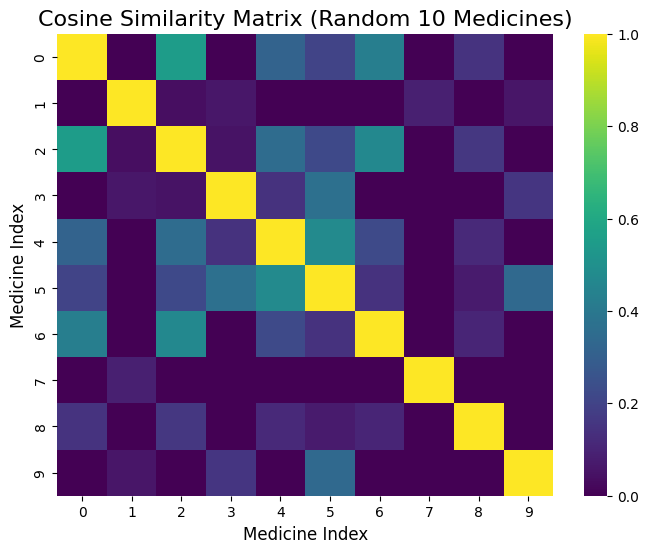

In [28]:
# Define the size of the subset
subset_size = 10

# Randomly select a subset of medicine indices
random_indices = random.sample(range(len(new_df)), subset_size)

# Create a subset similarity matrix
subset_similarity = similarity[np.ix_(random_indices, random_indices)]

plt.figure(figsize=(8, 6))

# Define the heatmap for the subset
sns.heatmap(subset_similarity, cmap='viridis', cbar=True)

# Set the title and labels
plt.title(f"Cosine Similarity Matrix (Random {subset_size} Medicines)", fontsize=16)
plt.xlabel("Medicine Index", fontsize=12)
plt.ylabel("Medicine Index", fontsize=12)

# Show the plot
plt.show()

# BAD Model

In [29]:
import pandas as pd
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Load the medicine dataset
medicines = pd.read_csv('medicine.csv')

# Drop rows with missing values
medicines.dropna(inplace=True)

# Combine 'Description' and 'Reason' columns into 'tags'
medicines['tags'] = medicines['Description'] + ' ' + medicines['Reason']

# Convert 'tags' to lowercase
medicines['tags'] = medicines['tags'].str.lower()

# Initialize CountVectorizer
cv = CountVectorizer(stop_words='english', max_features=5000)

# Stem words in 'tags'
ps = PorterStemmer()
medicines['tags'] = medicines['tags'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

# Fit and transform 'tags' using CountVectorizer
vectors = cv.fit_transform(medicines['tags']).toarray()

# Initialize KMeans with desired number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit KMeans to the data
kmeans.fit(vectors)

# Assign clusters to each medicine
medicines['cluster'] = kmeans.labels_

# Define a function to recommend similar medicines based on the given medicine name
# Define a function to recommend 5 medicines based on the given medicine name
def recommend(medicine):
    # Find the cluster of the given medicine
    cluster = medicines[medicines['Drug_Name'] == medicine]['cluster'].values[0]
    
    # Get all medicines in the same cluster
    cluster_medicines = medicines[medicines['cluster'] == cluster]
    
    # Remove the given medicine from the cluster
    cluster_medicines = cluster_medicines[cluster_medicines['Drug_Name'] != medicine]
    
    # Select 5 random medicines from the cluster
    recommended_medicines = cluster_medicines.sample(5)['Drug_Name'].values
    
    return recommended_medicines

# Call the recommend function with a sample medicine name
sample_medicine = "Paracetamol 125mg Syrup 60mlParacetamol 500mg Tablet 10'S"
recommendations = recommend(sample_medicine)
print(f"Recommended medicines for {sample_medicine}:")
for medicine in recommendations:
    print(medicine)



c:\Users\egypt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Recommended medicines for Paracetamol 125mg Syrup 60mlParacetamol 500mg Tablet 10'S:
Diclopara 50/500mg Tablet 10'S
ZEPARA Suspension 60ml
Dcr Plus Tablet 10's
Aldase D Tablet 10'S
Redynise Tablet 10'S


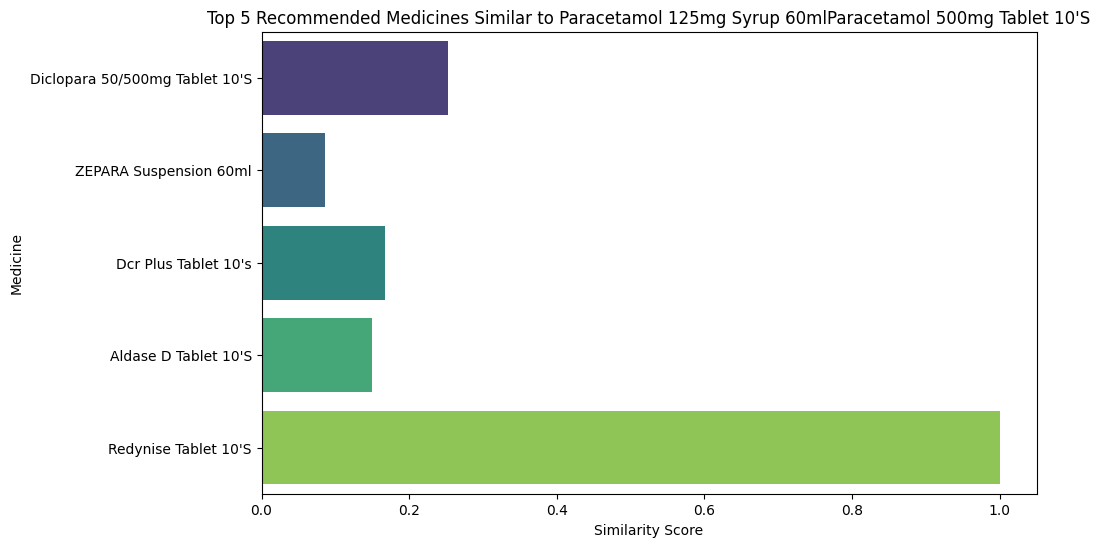

In [30]:
def visualize_recommendations(medicine, recommendations):
    # Find the index of the given medicine
    medicine_index = new_df[new_df['Drug_Name'] == medicine].index[0]
    
    # Get the similarity scores of the recommended medicines to the given medicine
    similarity_scores = similarity[medicine_index][new_df[new_df['Drug_Name'].isin(recommendations)].index]
    
    # Plot the similarity scores
    plt.figure(figsize=(10, 6))
    sns.barplot(x=similarity_scores, y=recommendations, palette='viridis')
    plt.title(f"Top 5 Recommended Medicines Similar to {medicine}")
    plt.xlabel('Similarity Score')
    plt.ylabel('Medicine')
    plt.show()

# Call the visualize_recommendations function
visualize_recommendations(sample_medicine, recommendations)
